In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [109]:
movie=pd.read_csv(r'C:\My data\Machine learning data set\ml-latest-small\ml-latest-small\movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [110]:
rating=pd.read_csv(r'C:\My data\Machine learning data set\ml-latest-small\ml-latest-small\ratings.csv')

In [111]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [112]:
df=pd.merge(movie,rating,on='movieId',how='inner')[['movieId','userId','rating','title']]
df.head()

,movieId,userId,rating,title
0,1,1,4.0,Toy Story (1995)
1,1,5,4.0,Toy Story (1995)
2,1,7,4.5,Toy Story (1995)
3,1,15,2.5,Toy Story (1995)
4,1,17,4.5,Toy Story (1995)


In [113]:
import datetime

In [114]:
rating['datetime']=pd.to_datetime(rating.timestamp)

In [115]:
pd.DataFrame(df.groupby('title')['rating'].mean())
df.groupby('title')['rating'].count()

title
'71 (2014)                                    1
'Hellboy': The Seeds of Creation (2004)       1
'Round Midnight (1986)                        2
'Salem's Lot (2004)                           1
'Til There Was You (1997)                     2
                                             ..
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, Length: 9719, dtype: int64

In [116]:
new_data=df.groupby(['movieId','title'])['rating'].agg({'mean','count'}).sort_values(by='mean',ascending=False).reset_index()

In [117]:
#new_data.sort_values(by='mean',ascending=False)
new_data.rename(columns={'mean':'avg_rating','count':'total_rating'},inplace=True)
new_data

,movieId,title,avg_rating,total_rating
0,88448,Paper Birds (Pájaros de papel) (2010),5.0,1
1,100556,"Act of Killing, The (2012)",5.0,1
2,143031,Jump In! (2007),5.0,1
3,143511,Human (2015),5.0,1
4,143559,L.A. Slasher (2015),5.0,1
...,...,...,...,...
9719,157172,Wizards of the Lost Kingdom II (1989),0.5,1
9720,85334,Hard Ticket to Hawaii (1987),0.5,1
9721,53453,Starcrash (a.k.a. Star Crash) (1978),0.5,1
9722,8494,"Cincinnati Kid, The (1965)",0.5,1


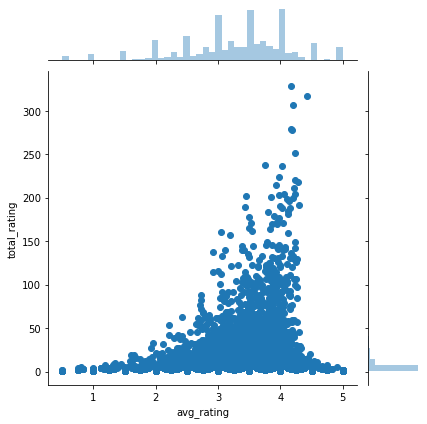

In [118]:
sns.jointplot(x='avg_rating',y='total_rating',data=new_data)

In [119]:
len(new_data[new_data.total_rating > 10])

2121

In [123]:
new_data = new_data[new_data.total_rating > 10]
new_data=new_data.merge(rating[['movieId','userId']],on='movieId',how='inner').drop_duplicates()

In [124]:
new_data.head()

,movieId,title,avg_rating,total_rating,userId
0,1041,Secrets & Lies (1996),4.590909,11,74
1,1041,Secrets & Lies (1996),4.590909,11,90
2,1041,Secrets & Lies (1996),4.590909,11,195
3,1041,Secrets & Lies (1996),4.590909,11,221
4,1041,Secrets & Lies (1996),4.590909,11,275


In [125]:
pvt_data=pd.pivot_table(new_data,columns='title',index='userId',values='avg_rating')

In [126]:
pvt_data

title,"'burbs, The (1989)",(500) Days of Summer (2009),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),12 Years a Slave (2013),127 Hours (2010),...,Zack and Miri Make a Porno (2008),Zero Dark Thirty (2012),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),Zootopia (2016),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.134615
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.877358,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.149123,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.509259,NaN,3.863636,2.770833,NaN


In [127]:
pvt_data.fillna(0,inplace=True)
pvt_data['(500) Days of Summer (2009)']

userId
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
606    0.000000
607    0.000000
608    0.000000
609    0.000000
610    3.666667
Name: (500) Days of Summer (2009), Length: 610, dtype: float64

In [132]:
pd.DataFrame(pvt_data.corrwith(pvt_data['(500) Days of Summer (2009)'])).sort_values(by=0, ascending=False)

,0
title,
(500) Days of Summer (2009),1.000000
Silver Linings Playbook (2012),0.507022
"Descendants, The (2011)",0.498348
"Crazy, Stupid, Love. (2011)",0.497178
Up in the Air (2009),0.487772
...,...
Disclosure (1994),-0.059826
Dances with Wolves (1990),-0.062673
"Madness of King George, The (1994)",-0.062920


In [129]:
df_shape = pd.DataFrame(pvt_data.corrwith(pvt_data['(500) Days of Summer (2009)'])).sort_values(by=0, ascending=False)

In [130]:
df_shape.rename(columns={0:'score'},inplace=True)

In [131]:
df_shape[df_shape.score > 0.7]

,score
title,
(500) Days of Summer (2009),1.0
